
image 1/1 e:\AIC2024-autograde\testset1\images\IMG_3960_iter_3.jpg: 1024x736 32 ticks, 32 not_ticks, 551.7ms
Speed: 8.0ms preprocess, 551.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 736)


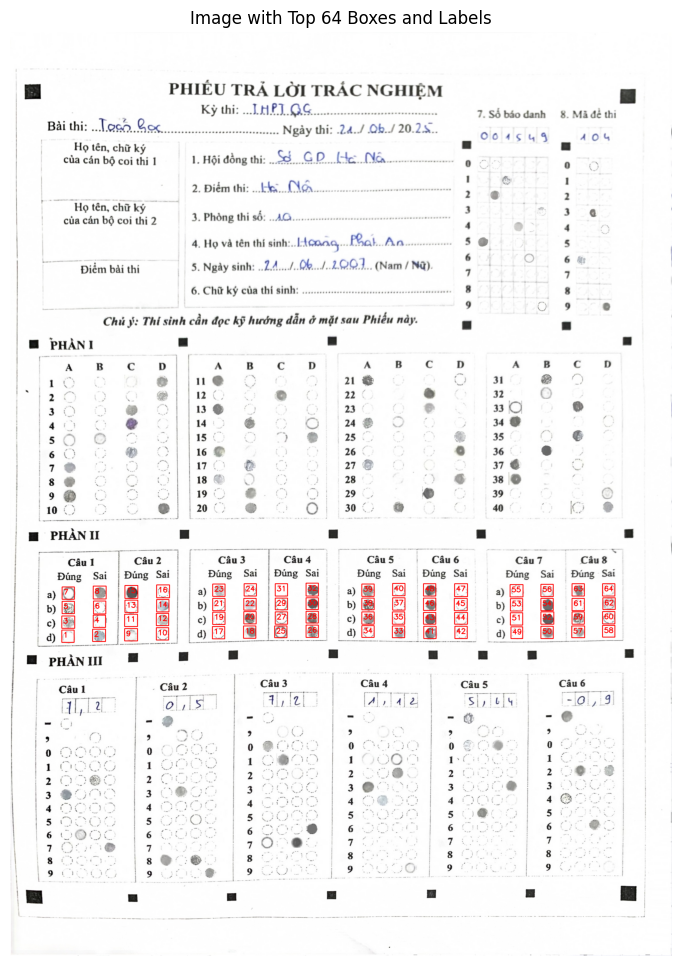

In [10]:
from ultralytics import YOLO
import numpy as np
import cv2
import matplotlib.pyplot as plt

model_path = 'best_part2.pt'
model = YOLO(model_path)
img_path = 'testset1/images/IMG_3960_iter_3.jpg'

results = model(img_path)
result = results[0]

boxes = result.boxes.xywhn.cpu().numpy() 
labels = result.boxes.cls.cpu().numpy() 
conf = result.boxes.conf.cpu().numpy()  

centers = np.column_stack((boxes[:, 0], boxes[:, 1]))

sorted_indices = np.argsort(centers[:, 0])
sorted_boxes = result.boxes[sorted_indices].xywhn.cpu().numpy()

final_sorted_boxes = []
for i in range(0, len(sorted_boxes), 8):
    cluster = sorted_boxes[i:i + 8]
    cluster_sorted = cluster[np.argsort(-cluster[:, 1])]
    final_sorted_boxes.append(cluster_sorted)

final_sorted_boxes = np.vstack(final_sorted_boxes)

original_image = cv2.imread(img_path)
image_height, image_width = original_image.shape[:2]
colors = [(0, 0, 255)] * 64
image_with_boxes = original_image.copy()

for idx, box in enumerate(final_sorted_boxes[:64]):
    x_center = int(box[0] * image_width)
    y_center = int(box[1] * image_height)
    box_width = int(box[2] * image_width)
    box_height = int(box[3] * image_height)

    x_min = x_center - box_width // 2
    y_min = y_center - box_height // 2
    x_max = x_center + box_width // 2
    y_max = y_center + box_height // 2

    cv2.rectangle(image_with_boxes, (x_min, y_min), (x_max, y_max), colors[idx], 2)
    cv2.putText(
        image_with_boxes,
        str(idx + 1),
        (x_min + 5, y_min + 25),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.8,
        colors[idx],
        2
    )

image_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Image with Top 64 Boxes and Labels")
plt.show()